In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importing Clean Data-Cleaned Dataframe from csv file 
df_clean=pd.read_csv(r'clean_data/clean_data.csv',index_col=[0])
df_clean.head()

,Home_Points,Away_Points,Date,HomeTeam,AwayTeam,FTHG,FTAG,Home_Goals,Away_Goals,Home_Goals_Conceded,...,TY_Points_Away,TY_Goals_Home,TY_Goals_Away,TY_Goals_Conceded_Home,TY_Goals_Conceded_Away,TY_Shots_Home,TY_Shots_Away,TY_Shots_On_Target_Home,TY_Shot_On_Target_Away,FTR
0,0.0,0.0,2006-08-19,Arsenal,Aston Villa,1,1,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,D
1,0.0,0.0,2006-08-19,Bolton,Tottenham,2,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,H
2,0.0,0.0,2006-08-19,Everton,Watford,2,1,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,H
3,0.0,0.0,2006-08-19,Newcastle,Wigan,2,1,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,H
4,0.0,0.0,2006-08-19,Portsmouth,Blackburn,3,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,H


In [3]:
#Importing Aggregated Table 
df_agg_table=pd.read_csv(r'clean_data/total_table.csv',index_col=[0])
df_agg_table.head()

,Team,Games,W,D,L,Points,Goals,Goals_Against,Shots,Shots_On_Target,League_Position
0,Man United,38,28,5,5,89,83,27,627,342,1
1,Chelsea,38,24,11,3,83,64,24,522,271,2
2,Liverpool,38,20,8,10,68,57,27,592,286,3
3,Arsenal,38,19,11,8,68,63,35,537,276,4
4,Tottenham,38,17,9,12,60,57,54,442,237,5


In [4]:
df_agg_table['GD']=df_agg_table['Goals']-df_agg_table['Goals_Against']

In [5]:
df_grouped_table=df_agg_table.groupby('Team').mean()
df_grouped_table.head()

,Games,W,D,L,Points,Goals,Goals_Against,Shots,Shots_On_Target,League_Position,GD
Team,,,,,,,,,,,
Arsenal,38.0,21.200000,8.800000,8.000000,72.400000,71.800000,40.800000,561.300000,275.700000,3.800000,31.000000
Aston Villa,38.0,11.625000,12.250000,14.125000,47.125000,46.375000,53.500000,411.625000,198.125000,11.000000,-7.125000
Birmingham,38.0,9.666667,12.333333,16.000000,41.333333,40.333333,55.666667,349.666667,188.000000,15.666667,-15.333333
Blackburn,38.0,12.000000,9.833333,16.166667,45.833333,46.166667,59.000000,417.333333,221.833333,12.500000,-12.833333
Blackpool,38.0,10.000000,9.000000,19.000000,39.000000,55.000000,78.000000,446.000000,235.000000,19.000000,-23.000000


/home/addybrown/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


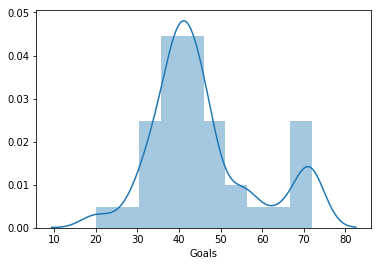

In [6]:
#Can we find a distribution for all statistics including goals, goals_against, shots, shots on target

sns.distplot(df_grouped_table['Goals'])

#### Can see quite a difference between average teams and elite teams

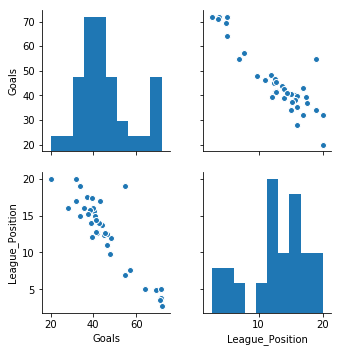

In [7]:
sns.pairplot(df_grouped_table[['Goals','League_Position']])

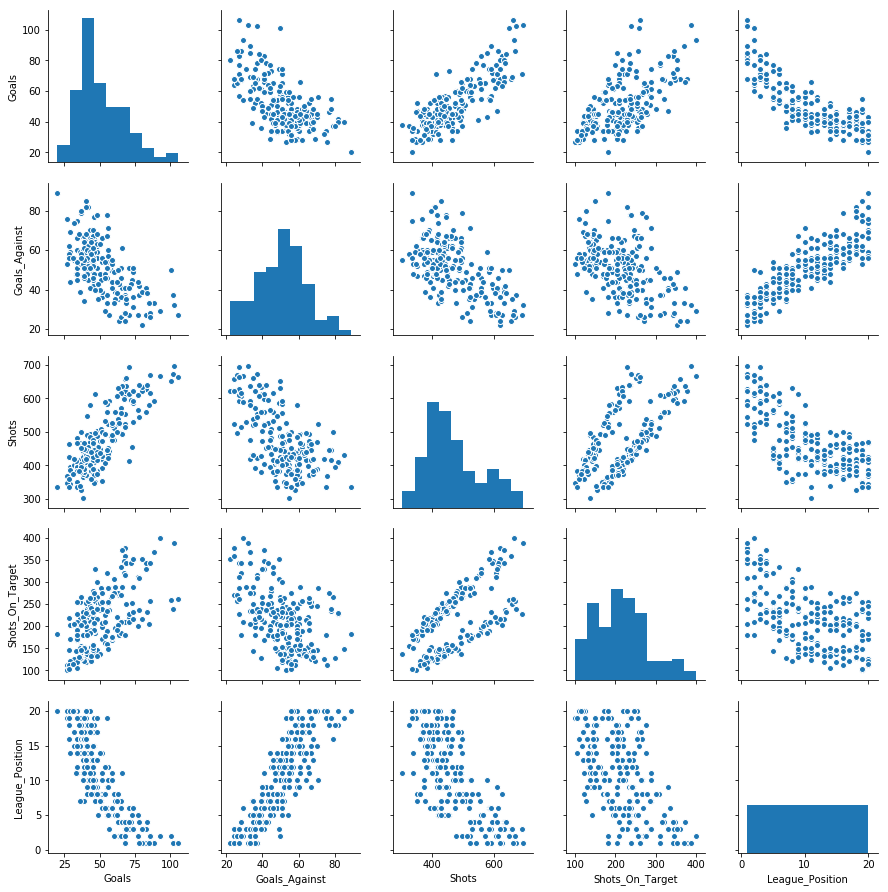

In [8]:
sns.pairplot(df_agg_table[['Goals','Goals_Against','Shots','Shots_On_Target','League_Position']])

#### Can clearly see that there is correlation between goals, shots, conceding less goals and league position 

/home/addybrown/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


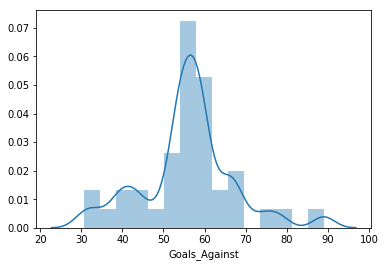

In [9]:

sns.distplot(df_grouped_table['Goals_Against'])

In [10]:
'''Now visualize the match by match data, note the hardest part of prediction is predicting when draws occur
'''

'Now visualize the match by match data, note the hardest part of prediction is predicting when draws occur\n'

In [11]:
df_clean.columns

Index(['Home_Points', 'Away_Points', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG',
       'FTAG', 'Home_Goals', 'Away_Goals', 'Home_Goals_Conceded',
       'Away_Goals_Conceded', 'Form_Rating_Home', 'Form_Rating_Away',
       'Home_Shots', 'Away_Shots', 'Home_Shots_Target', 'Away_Shots_Target',
       'Home_Corners', 'Away_Corners', 'Home_Yellow', 'Away_Yellow',
       'Home_Red', 'Away_Red', 'G1.H', 'G2.H', 'G3.H', 'G1.A', 'G2.A', 'G3.A',
       'This_Year_LP_Home', 'Last_Year_LP_Home', 'This_Year_LP_Away',
       'Last_Year_LP_Away', 'TY_Points_Home', 'TY_Points_Away',
       'TY_Goals_Home', 'TY_Goals_Away', 'TY_Goals_Conceded_Home',
       'TY_Goals_Conceded_Away', 'TY_Shots_Home', 'TY_Shots_Away',
       'TY_Shots_On_Target_Home', 'TY_Shot_On_Target_Away', 'FTR'],
      dtype='object')

In [12]:
winning_percentage_home=100*len(df_clean[df_clean['FTR']=='H'])/len(df_clean)
print('The Winning Percentage of the Home Team is: '+ str(round(winning_percentage_home,2))+ '%')
winning_percentage_away=100*len(df_clean[df_clean['FTR']=='A'])/len(df_clean)
print('The Winning Percentage of the Home Team is: '+ str(round(winning_percentage_away,2))+ '%')
draw_percentage=100*len(df_clean[df_clean['FTR']=='D'])/len(df_clean)
print('The Draw Percentage is: '+ str(round(draw_percentage,2))+ '%')

The Winning Percentage of the Home Team is: 46.58%
The Winning Percentage of the Home Team is: 28.08%
The Draw Percentage is: 25.34%


#### It is clear that you can win 46% of the time by just picking the home team for every match over the past 10 years, note books generally have a winning percentage higher than about 53% so the goal would be to get a model just about better than the books

/home/addybrown/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


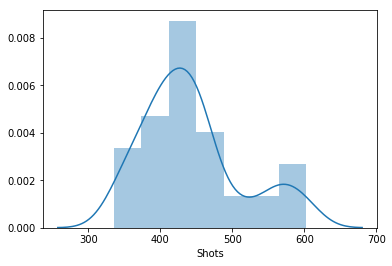

In [13]:
#Looking at data a different way, can we distinguish elite, mid-table, and relegation teams 

sns.distplot(df_grouped_table['Shots'])

/home/addybrown/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


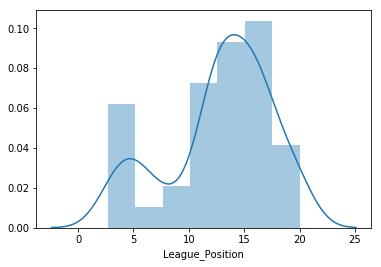

In [14]:
sns.distplot(df_grouped_table['League_Position'])

In [15]:
'''
What this data shows is that there is a clear amount of distance between the top 5 or 6 and the rest of the league, these could
be classified as the elite teams in the premier league. 

'''

'\nWhat this data shows is that there is a clear amount of distance between the top 5 or 6 and the rest of the league, these could\nbe classified as the elite teams in the premier league. \n\n'

In [16]:
def reject_outliers(data, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data.loc[s<m]

In [17]:
elite_table=df_agg_table[df_agg_table['League_Position']<6.0]
below_elite_table=df_agg_table[df_agg_table['League_Position']>=6.0][df_agg_table['League_Position']<10.0]
mid_table=df_agg_table[df_agg_table['League_Position']>=10.0][df_agg_table['League_Position']<17.0]
relegation_table=df_agg_table[df_agg_table['League_Position']>=17.0]

/home/addybrown/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/addybrown/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


/home/addybrown/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/addybrown/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/addybrown/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/addybrown/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


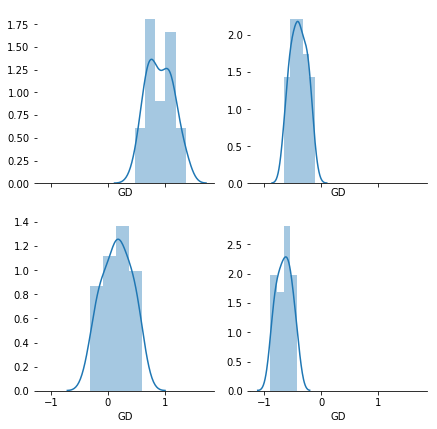

In [18]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)



sns.distplot(reject_outliers(elite_table['GD']/38.0),ax=axes[0, 0])
sns.distplot(reject_outliers(below_elite_table['GD']/38.0),ax=axes[1,0])
sns.distplot(reject_outliers(mid_table['GD']/38.0),ax=axes[0,1])
sns.distplot(reject_outliers(relegation_table['GD']/38.0),ax=axes[1,1])

In [19]:
'''

All Goal Differences tend to hanve a normal or somewhat normal distribution, within two standard deviations which provides
a 95% probability that the data point is within the appropriate range (95% confidence) 5% margin of error 

Similar will be done by points distribution to determine if the team is 

1. Elite
2. Below Elite
3. Mid-Table
4. Relegation 

Then bar graph will be plotted and feature engineered to see if there is any correlation to the match results. 

'''
m=1
#Goal Differences
elite=reject_outliers(elite_table['GD']/38.0)
elite_max=np.mean(elite)+m*np.std(elite)
elite_min=np.mean(elite)-m*np.std(elite)

below_elite=reject_outliers(below_elite_table['GD']/38.0)
below_elite_max=np.mean(below_elite)+m*np.std(below_elite)
below_elite_min=np.mean(below_elite)-m*np.std(below_elite)


mid=reject_outliers(mid_table['GD']/38.0)
mid_max=np.mean(mid)+m*np.std(mid)
mid_min=np.mean(mid)-m*np.std(mid)

rel=reject_outliers(relegation_table['GD']/38.0)
rel_max=np.mean(rel)+m*np.std(rel)
rel_min=np.mean(rel)-m*np.std(rel)


goal_diff_ranges=[[elite_min,elite_max],[below_elite_min,below_elite_max],[mid_min,mid_max],[rel_min,rel_max]]


#Points
elite=reject_outliers(elite_table['Points']/38.0)
elite_max=np.mean(elite)+m*np.std(elite)
elite_min=np.mean(elite)-m*np.std(elite)

below_elite=reject_outliers(below_elite_table['Points']/38.0)
below_elite_max=np.mean(below_elite)+2*np.std(below_elite)
below_elite_min=np.mean(below_elite)-2*np.std(below_elite)


mid=reject_outliers(mid_table['Points']/38.0)
mid_max=np.mean(mid)+m*np.std(mid)
mid_min=np.mean(mid)-m*np.std(mid)

rel=reject_outliers(relegation_table['Points']/38.0)
rel_max=np.mean(rel)+m*np.std(rel)
rel_min=np.mean(rel)-m*np.std(rel)


points_ranges=[[elite_min,elite_max],[below_elite_min,below_elite_max],[mid_min,mid_max],[rel_min,rel_max]]

In [20]:
print(points_ranges)
print('---------------------------------------------------------')
print(goal_diff_ranges)

[[1.7967326811739206, 2.2234240937420933], [1.1743799183758195, 1.7522128794081144], [1.0801275444620337, 1.209346139748492], [0.8386087351832757, 0.9923322536524494]]
---------------------------------------------------------
[[0.6850395996909784, 1.1442633875067454], [-0.09672125775406226, 0.4095032126412803], [-0.5385367981913656, -0.25093688601916075], [-0.7842219179521296, -0.5140236960829584]]


In [21]:
df_clean['Home_GD']=df_clean['Home_Goals']-df_clean['Home_Goals_Conceded']
df_clean['Away_GD']=df_clean['Away_Goals']-df_clean['Away_Goals_Conceded']

In [22]:
df_clean['Team_Caliber_Home']=0
df_clean['Team_Caliber_Away']=0

for i in enumerate(df_clean.Date):
    
    home_GD=df_clean.loc[i[0],'Home_GD']
    away_GD=df_clean.loc[i[0],'Away_GD']
    home_points=df_clean.loc[i[0],'Home_Points']
    away_points=df_clean.loc[i[0],'Away_Points']
    
    
    
    iFlag_home=[0,0]
    iFlag_away=[0,0]
    
    
    
    #For Goal_Difference Home       
    if (home_GD>goal_diff_ranges[0][0]):
        iFlag_home[0]=1
            
    elif home_GD>goal_diff_ranges[1][0] and home_GD<=goal_diff_ranges[0][0]:
        iFlag_home[0]=2
    
    elif home_GD>goal_diff_ranges[2][0] and home_GD<=goal_diff_ranges[1][0]: 
        iFlag_home[0]=3
    else:
        iFlag_home[0]=4
    
    #For Goal_Difference Away 
    if (away_GD>goal_diff_ranges[0][0]):
        iFlag_away[0]=1
            
    elif away_GD>goal_diff_ranges[1][0] and away_GD<=goal_diff_ranges[0][0]:
        iFlag_away[0]=2
    
    elif away_GD>goal_diff_ranges[2][0] and away_GD<=goal_diff_ranges[1][0]: 
        iFlag_away[0]=3
    else:
        iFlag_away[0]=4
    
    #For Points Home 
    if (home_points>points_ranges[0][0]):
        iFlag_home[1]=1
            
    elif home_points>points_ranges[1][0] and home_points<=points_ranges[0][0]:
        iFlag_home[1]=2
    
    elif home_points>points_ranges[2][0] and home_points<=points_ranges[1][0]: 
        iFlag_home[1]=3
    else:
        iFlag_home[1]=4
    
    #For Points Away 
    if (away_points>points_ranges[0][0]):
        iFlag_away[1]=1
            
    elif away_points>points_ranges[1][0] and away_points<=points_ranges[0][0]:
        iFlag_away[1]=2
    
    elif away_points>points_ranges[2][0] and away_points<=points_ranges[1][0]: 
        iFlag_away[1]=3
    else:
        iFlag_away[1]=4 
    

    
    #Caliber Home
    if iFlag_home[0]+iFlag_home[1]<=3:
        df_clean.loc[i[0],'Team_Caliber_Home']=1
    elif iFlag_home[0]+iFlag_home[1]<=5:
        df_clean.loc[i[0],'Team_Caliber_Home']=2
    elif iFlag_home[0]+iFlag_home[1]<=7:
        df_clean.loc[i[0],'Team_Caliber_Home']=3
    else:
        df_clean.loc[i[0],'Team_Caliber_Home']=4
    
    #Caliber Away 
    if iFlag_away[0]+iFlag_away[1]<=3:
        df_clean.loc[i[0],'Team_Caliber_Away']=1
    elif iFlag_away[0]+iFlag_away[1]<=5:
        df_clean.loc[i[0],'Team_Caliber_Away']=2
    elif iFlag_away[0]+iFlag_away[1]<=7:
        df_clean.loc[i[0],'Team_Caliber_Away']=3
    else:
        df_clean.loc[i[0],'Team_Caliber_Away']=4

In [27]:
#Done to eliminate 0 point value from start of dataset 
trial=df_clean[df_clean['Date']>'2008-01-01']

In [42]:
def create_prob(trial,val): 
    stored_main=[]
    #val='H'
    for i in range(1,5):

        stored_temp=[]
        for j in range(1,5):
            m=i
            n=j

            a=len(trial['FTR'][trial['Team_Caliber_Home']==m][trial['Team_Caliber_Away']==n][trial['FTR']==val])
            b=len(trial['FTR'][trial['Team_Caliber_Home']==m][trial['Team_Caliber_Away']==n])
            Prob=round((a/b),2)
            stored_temp.append(Prob)
        stored_main.extend([stored_temp])
    return stored_main

In [43]:
draw_prob=create_prob(trial,'D')
home_prob=create_prob(trial,'H')
away_prob=create_prob(trial,'A')

In [46]:
draw_table_prob=pd.DataFrame(draw_prob)
home_table_prob=pd.DataFrame(home_prob)
away_table_prob=pd.DataFrame(away_prob)

In [51]:
caliber_names=['elite','below_elite','mid-table','relegation']
draw_table_prob.columns=caliber_names
draw_table_prob.index=caliber_names

caliber_names=['elite','below_elite','mid-table','relegation']
home_table_prob.columns=caliber_names
home_table_prob.index=caliber_names

caliber_names=['elite','below_elite','mid-table','relegation']
away_table_prob.columns=caliber_names
away_table_prob.index=caliber_names

In [58]:
print('INDEX---> HOME TEAM CALIBER   COLUMMNS---->AWAY TEAM CALIBER')
print('-----------------------------------------------------------')
print('DRAW PROBABILITIES')
print(draw_table_prob)
print('-----------------------------------------------------------')
print('HOME WIN PROBABILITIES')
print(home_table_prob)
print('-----------------------------------------------------------')
print('AWAY WIN PROBABILITIES')
print(away_table_prob)

INDEX---> HOME TEAM CALIBER   COLUMMNS---->AWAY TEAM CALIBER
-----------------------------------------------------------
DRAW PROBABILITIES
             elite  below_elite  mid-table  relegation
elite         0.26         0.22       0.20        0.18
below_elite   0.27         0.26       0.26        0.22
mid-table     0.20         0.30       0.33        0.27
relegation    0.15         0.29       0.22        0.29
-----------------------------------------------------------
HOME WIN PROBABILITIES
             elite  below_elite  mid-table  relegation
elite         0.52         0.68       0.71        0.73
below_elite   0.24         0.45       0.55        0.60
mid-table     0.24         0.35       0.43        0.53
relegation    0.19         0.35       0.54        0.39
-----------------------------------------------------------
AWAY WIN PROBABILITIES
             elite  below_elite  mid-table  relegation
elite         0.22         0.10       0.09        0.09
below_elite   0.49         0.29   

### Observations: 

#### The highest probability of a draw occurring is when both mid-table teams play against one another. 

#### When elite teams play each other, the home team wins 52% of the time, regardless elite teams as expected win majority of their games against worse teams regardless of where the game is played. That being said being at home is a clear advantage. 

In [87]:

m=1
val='D'
a=len(trial[trial['Team_Caliber_Home']==m][trial['FTR']==val])
b=len(trial[trial['Team_Caliber_Home']==m])
a/b

/home/addybrown/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


0.2152080344332855

In [88]:
### Can see that the probability of winning of a relegation and midtable team is the same, their differation is the ability to 
# get draws, meaning teams that get draws. 

In [91]:
def changeValue(value):
    if value>20:
        return 21
    elif value==0:
        return 21
    else:
        return value

In [92]:
df_clean['This_Year_LP_Away']=df_clean['This_Year_LP_Away'].apply(changeValue)
df_clean['This_Year_LP_Home']=df_clean['This_Year_LP_Away'].apply(changeValue)
df_clean['Last_Year_LP_Away']=df_clean['Last_Year_LP_Away'].apply(changeValue)
df_clean['Last_Year_LP_Home']=df_clean['Last_Year_LP_Home'].apply(changeValue)

In [93]:
df_clean.to_csv('clean_data/training_data.csv')

In [94]:
df_clean.columns

Index(['Home_Points', 'Away_Points', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG',
       'FTAG', 'Home_Goals', 'Away_Goals', 'Home_Goals_Conceded',
       'Away_Goals_Conceded', 'Form_Rating_Home', 'Form_Rating_Away',
       'Home_Shots', 'Away_Shots', 'Home_Shots_Target', 'Away_Shots_Target',
       'Home_Corners', 'Away_Corners', 'Home_Yellow', 'Away_Yellow',
       'Home_Red', 'Away_Red', 'G1.H', 'G2.H', 'G3.H', 'G1.A', 'G2.A', 'G3.A',
       'This_Year_LP_Home', 'Last_Year_LP_Home', 'This_Year_LP_Away',
       'Last_Year_LP_Away', 'TY_Points_Home', 'TY_Points_Away',
       'TY_Goals_Home', 'TY_Goals_Away', 'TY_Goals_Conceded_Home',
       'TY_Goals_Conceded_Away', 'TY_Shots_Home', 'TY_Shots_Away',
       'TY_Shots_On_Target_Home', 'TY_Shot_On_Target_Away', 'FTR', 'Home_GD',
       'Away_GD', 'Team_Caliber_Home', 'Team_Caliber_Away'],
      dtype='object')